<a href="https://colab.research.google.com/github/NSPFD/IBM_-QUANTUM/blob/main/BZ_Algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bernstein-Vazirani

In [ ]:
### For people using Google-colab un-comment this cell and run it!
!pip install qiskit
!pip install qiskit_aer
!pip install qiskit[visualization]
!pip install qiskit-ibm-runtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 77.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=086a8fa2656e8be41d3afc1739d0e21c9c8e9eb44fadc07107d7204595ebe9e6
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

###  Importing the required libraries

In [ ]:
import time
import numpy as np
from qiskit import *
from qiskit.circuit import Parameter
from qiskit.quantum_info import Statevector, Pauli, SparsePauliOp
from qiskit.circuit.library import RealAmplitudes
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
from qiskit.visualization import plot_histogram
# %config InlineBackend.figure_format='retina'

# Part II: Getting Started with Qiskit Runtime

We shall get started with Qiskit Runtime. Qiskit Runtime is already installed and setup for you in the IBM Quantum Lab instance of the IBM Quantum Challenge you are in.

If you are running on your local systems, you may need to install Qiskit Runtime packages which can be dones uing: `pip install qiskit-ibm-runtime`. If you have navigated to the IBM Quantum Lab throught the IBM Quantum Challenge portal, then everything should already be setup for you.

To start off, the first thing to do here is to define `QiskitRuntimeService` instance to run the program on. We can use this to call the currently available two primitives as needed; `Sampler` and `Estimator` and run them on Qiskit Runtime.

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Options, Sampler, Estimator

The block below saves your Runtime account credentials for your current environment. The `channel` keyword argument lets the Runtime know whether you are using the regular IBM Quantum (`channel='ibm_quantum'`) or IBM Cloud (`channel='ibm_cloud'`). We will be using the `ibm_quantum` channel for all our runs. This cell can be run just once and your credentials should be saved for that environment. And for the `token` keyword argument, your API token value is found in this link: **[quantum-computing.ibm.com/account](https://quantum-computing.ibm.com/account)**.

If you are on the IBM Quantum Lab, you can simply call the `QiskitRuntimeService` with just the channel in your subsequent runs.

In [ ]:
# Save the Runtime account credentials if you have not done so already
# If you need to overwrite the account info, please add `overwrite=True`
# QiskitRuntimeService.save_account(channel='ibm_quantum', token='my_token', overwrite=True)

In [ ]:
 service = QiskitRuntimeService(channel='ibm_quantum')

AccountNotFoundError: 'Unable to find account.'

Now that your service is setup, the service allows you to view all the backends that you have access to. Let's run the command below to display all the available backends that can utilize Qiskit Runtime.

In [ ]:
# service.backends()

[<IBMBackend('ibmq_qasm_simulator')>,
 <IBMBackend('ibmq_lima')>,
 <IBMBackend('ibmq_belem')>,
 <IBMBackend('ibmq_quito')>,
 <IBMBackend('simulator_statevector')>,
 <IBMBackend('simulator_mps')>,
 <IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('simulator_stabilizer')>,
 <IBMBackend('ibmq_manila')>,
 <IBMBackend('ibm_nairobi')>,
 <IBMBackend('ibm_oslo')>]

# Example using Sampler

### Bernstein-Vazirani algorithm

This algorithm is one of special quantum algorithms which showed that there can be advantages in using a quantum computer as a computational tool for more complex problems.

There is a function returning the bitwise product of the input with a hidden string of bits $ s $. Its length is $ n $.

$$ f(x) = s ⋅ x (\mathrm{mod} 2) $$

To find the hidden string, we would need to call the function $f$ for $ n $ times. However, using a quantum computer, we can solve this problem with 100% confidence after **only one call** to the function . The quantum Bernstein-Vazirani algorithm to find the hidden bit string is very simple:

1. Initialize the inputs qubits to the state $|0\rangle^{\otimes n}$, and output qubit to $|-\rangle$.
2. Apply Hadamard gates to the input register
3. Query the oracle
4. Apply Hadamard gates to the input register
5. Measure

For more in detailed information about the Bernstein-Vazirani algorithm, feel free to check out this helpful chapter in the Qiskit textbook: **https://learn.qiskit.org/course/ch-algorithms/bernstein-vazirani-algorithm**. Or you may refer Ep. 6 of Coding with Qiskit Season 1 in Qiskit Youtube: **[Bernstein-Vazirani Algorithm](https://youtu.be/sqJIpHYl7oo)**.

In the below, there is an example for the Bernstein Vazirani algorithm to find the hidden bit string "001".

In [ ]:
hidden = "001"
print(len(hidden))

3


For this hidden string, we need 3 input qubits and 1 output qubit.

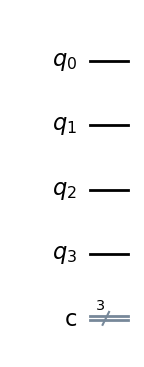

In [ ]:
# Make a quantum circuit
qc = QuantumCircuit(4, 3)
display(qc.draw(output="mpl"))

Step 1. Initialize the inputs qubits to the state $|0\rangle^{\otimes n}$, and output qubit to $|-\rangle$.

At first every qubit is initialized as $|0\rangle$ so we don't have to apply any gate for input qubits. However, the output qubit state should be changed as $|-\rangle$. For it, we will apply X-gate and then H-gate (Hadamard gate).

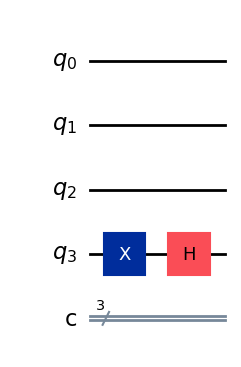

In [ ]:
qc.x(3)
qc.h(3)
display(qc.draw(output="mpl"))

Step 2. Apply Hadamard gates to the input register.

We will apply Hadamard gates to each input qubit.

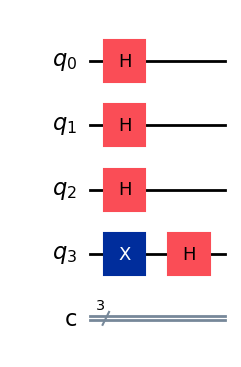

In [ ]:
qc.h(0)
qc.h(1)
qc.h(2)
display(qc.draw(output="mpl"))

Step 3. Query the oracle.

We will use CNOT gate to query the oracle. As our hidden circuit is "001", we will apply CNOT gate to qubit 0 and the output gate. Note: In Qiskit, numbers are assigned to the bits in a string **from right to left**.

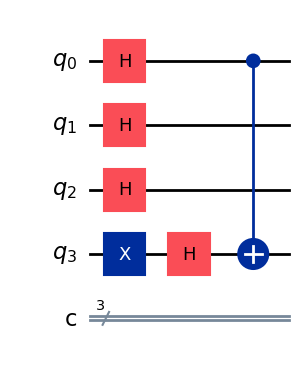

In [ ]:
qc.cx(0,3)
display(qc.draw(output="mpl"))

Step 4. Apply Hadamard gates to the input register.

We will apply Hadamard gates to each input qubit again.

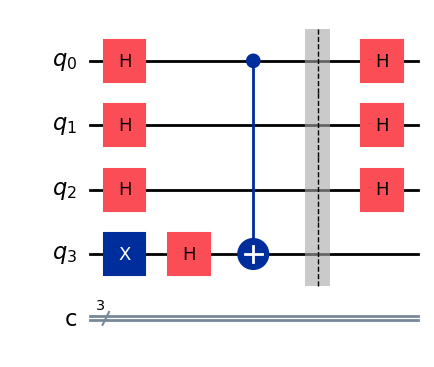

In [ ]:
qc.barrier()
qc.h(0)
qc.h(1)
qc.h(2)
display(qc.draw(output="mpl"))

Step 5. Measure.

We will measure all the input qubits with [`measure`](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.measure.html) method.

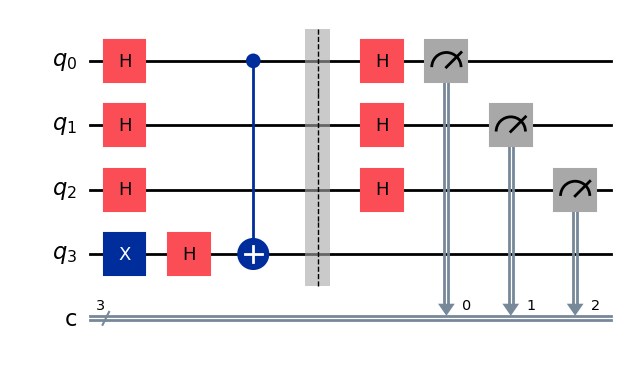

In [ ]:
qc.measure(range(3), range(3))
display(qc.draw(output="mpl"))

The circuit is ready to run on the simulator. You can check the result by running the cell below.

In [ ]:
# Use local simulator
from qiskit_aer import QasmSimulator

shots = 1024
qasm_backend = QasmSimulator()
results = qasm_backend.run(circuits= qc, shots = shots).result()
results.get_counts()


{'001': 1024}

If you see the result, you can see the hidden string "001" which we set at very first.

<a id="exercise1"></a>
<div class="alert alert-block alert-success">
    
<b> Exercise 1:</b>
    
Let us build the Bernstein Vazirani function.
Note that there is only one parameter which will be a hidden string.
This string consists of "0" and "1".
In the below code block, you should build a function which works well in all general strings
to pass the grader.
    
</div>

In [ ]:
def bernstein_vazirani(string):
    #Write your code here!
    # Save the length of string


    return qc

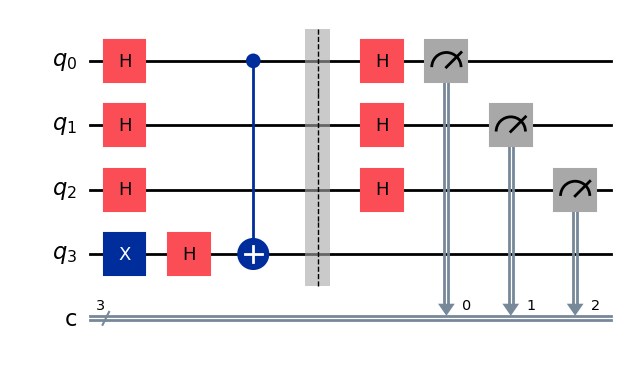

In [ ]:
bernstein_vazirani('001').draw('mpl')

Now, we shall call the function above to construct a Bernstein-Vazirani circuit as defined:

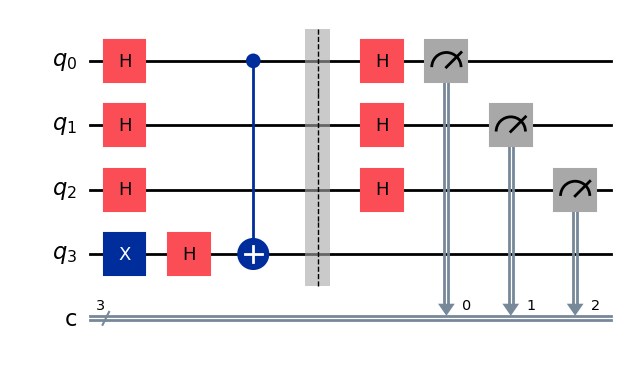

In [ ]:
# Submit your answer using following code
hidden_string = '1011'
qc_bz  =bernstein_vazirani(hidden_string)
qc_bz.draw('mpl')

In [ ]:
sim_result = qasm_backend.run(qc_bz).result()
sim_result.get_counts()

{'001': 1024}

In [ ]:
print('The hidden key is:',list(sim_result.get_counts().keys())[0])

The hidden key is: 001


# Deutsch-Jozsa Algorithm

- To implement the Deutsch-Jozsa algorithm in Qiskit, we'll start by generating a quantum circuit.
- That implements a query operation for a randomly selected function that satisfies the promise: with 50% chance the function is constant, and with 50% change the function is balanced.
- For each possibility, the function is selected uniformly from the possibilities.


In [ ]:
from qiskit import QuantumCircuit
import numpy as np

def dj_function(num_qubits):
    """
    Create a random Deutsch-Jozsa function.
    """

    qc = QuantumCircuit(num_qubits + 1)
    if np.random.randint(0, 2):
        # Flip output qubit with 50% chance
        qc.x(num_qubits)
    if np.random.randint(0, 2):
        # return constant circuit with 50% chance
        return qc

    # next, choose half the possible input states
    on_states = np.random.choice(
        range(2**num_qubits),  # numbers to sample from
        2**num_qubits // 2,  # number of samples
        replace=False,  # makes sure states are only sampled once
    )

    def add_cx(qc, bit_string):
        for qubit, bit in enumerate(reversed(bit_string)):
            if bit == "1":
                qc.x(qubit)
        return qc

    for state in on_states:
        qc.barrier()  # Barriers are added to help visualize how the functions are created. They can safely be removed.
        qc = add_cx(qc, f"{state:0b}")
        qc.mcx(list(range(num_qubits)), num_qubits)
        qc = add_cx(qc, f"{state:0b}")

    qc.barrier()

    return qc

We can show the quantum circuit implementation of the query gate using the draw method.

In [ ]:
display(dj_function(3).draw())

░ ┌───┐     ┌───┐ ░                 ░                 ░       ░ 
q_0: ─░─┤ X ├──■──┤ X ├─░────────■────────░────────■────────░───■───░─
      ░ ├───┤  │  ├───┤ ░ ┌───┐  │  ┌───┐ ░        │        ░   │   ░ 
q_1: ─░─┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├─░────────■────────░───■───░─
      ░ └───┘  │  └───┘ ░ ├───┤  │  ├───┤ ░ ┌───┐  │  ┌───┐ ░   │   ░ 
q_2: ─░────────■────────░─┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├─░───■───░─
      ░      ┌─┴─┐      ░ └───┘┌─┴─┐└───┘ ░ └───┘┌─┴─┐└───┘ ░ ┌─┴─┐ ░ 
q_3: ─░──────┤ X ├──────░──────┤ X ├──────░──────┤ X ├──────░─┤ X ├─░─
      ░      └───┘      ░      └───┘      ░      └───┘      ░ └───┘ ░

In [ ]:
def compile_circuit(function: QuantumCircuit):
    """
    Compiles a circuit for use in the Deutsch-Jozsa algorithm.
    """
    n = function.num_qubits - 1
    qc = QuantumCircuit(n + 1, n)
    qc.x(n)
    qc.h(range(n + 1))
    qc.compose(function, inplace=True)
    qc.h(range(n))
    qc.measure(range(n), range(n))
    return qc

Finally, a function that runs the Deutsch-Jozsa circuit once is defined.



In [ ]:
from qiskit_aer import AerSimulator

def dj_algorithm(function: QuantumCircuit):
    """
    Determine if a Deutsch-Jozsa function is constant or balanced.
    """
    qc = compile_circuit(function)

    result = AerSimulator().run(qc, shots=1, memory=True).result()
    measurements = result.get_memory()
    if "1" in measurements[0]:
        return "balanced"
    return "constant"

In [ ]:
f = dj_function(3)
display(f.draw())
display(dj_algorithm(f))

░                 ░ ┌───┐     ┌───┐ ░                 ░ ┌───┐     »
q_0: ──────░────────■────────░─┤ X ├──■──┤ X ├─░────────■────────░─┤ X ├──■──»
           ░ ┌───┐  │  ┌───┐ ░ ├───┤  │  ├───┤ ░ ┌───┐  │  ┌───┐ ░ ├───┤  │  »
q_1: ──────░─┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├─░─┤ X ├──■──»
           ░ ├───┤  │  ├───┤ ░ └───┘  │  └───┘ ░ └───┘  │  └───┘ ░ ├───┤  │  »
q_2: ──────░─┤ X ├──■──┤ X ├─░────────■────────░────────■────────░─┤ X ├──■──»
     ┌───┐ ░ └───┘┌─┴─┐└───┘ ░      ┌─┴─┐      ░      ┌─┴─┐      ░ └───┘┌─┴─┐»
q_3: ┤ X ├─░──────┤ X ├──────░──────┤ X ├──────░──────┤ X ├──────░──────┤ X ├»
     └───┘ ░      └───┘      ░      └───┘      ░      └───┘      ░      └───┘»
«     ┌───┐ ░ 
«q_0: ┤ X ├─░─
«     ├───┤ ░ 
«q_1: ┤ X ├─░─
«     ├───┤ ░ 
«q_2: ┤ X ├─░─
«     └───┘ ░ 
«q_3: ──────░─
«           ░

'balanced'

# Additional information

<b>Created by:</b> Dayeong Kang, Yuri Kobayashi, Vishal Bajpe, Kifumi Numata


<b>Advisor:</b> Ikko Hanamura
<b>Presented by:</b> Sumit
<b>Creative assets by:</b> Radha Pyari Sandhir

Version: 1.0

In [ ]:
import qiskit
qiskit.__version__

'1.1.1'

In [ ]:
def bernstein_vazirani(string):

  stringlen = len(string)
  qc = QuantumCircuit(stringlen+1, stringlen)
  qc.x(stringlen)
  qc.h(range(stringlen+1))
  for i in range(stringlen):
    if string[i] == '1':
      qc.cx(i,stringlen)

      qc.barrier()

  qc.h(range(stringlen))
  qc.barrier()

  qc.measure(range(stringlen), range(stringlen))
  return qc

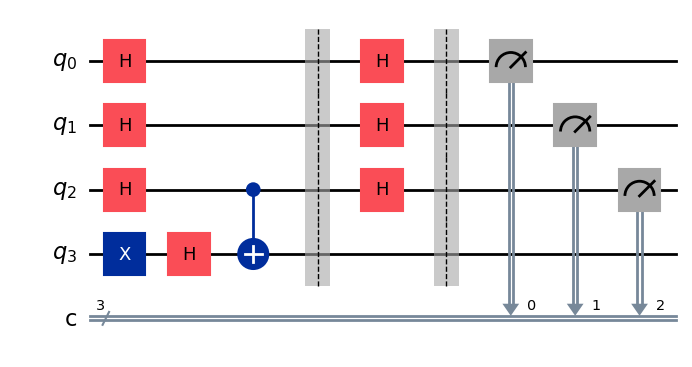

In [ ]:
bernstein_vazirani('001').draw('mpl')